In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap

from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, make_scorer
from tensorflow.keras.models import Sequential

In [20]:
import warnings
warnings.filterwarnings('ignore')

## Reading data

In [2]:
X_raw = []
y_true = []

with open('hw8_raw_data.csv', 'r') as file:
    lines = file.readlines()
    for line in lines:
        splitted_line = line.split(' ')
        X_raw.append([float(x) for x in splitted_line[:27]])
        label = splitted_line[-1]
        y_true.append(1 if label == 'Outlier\n' else 0)

X_raw = np.array(X_raw)
y_true = np.array(y_true)

In [3]:
y_true.sum()

1508

In [4]:
X_raw.shape

(50000, 27)

In [5]:
X_raw

array([[8.72811777e-01, 4.52112269e-06, 0.00000000e+00, ...,
        5.42534722e-05, 6.80428964e-03, 1.53853805e-02],
       [9.75206163e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.01189959e-04, 0.00000000e+00],
       [9.63776765e-01, 0.00000000e+00, 0.00000000e+00, ...,
        3.93337674e-04, 3.80000362e-03, 0.00000000e+00],
       ...,
       [9.80091236e-01, 6.71386719e-04, 0.00000000e+00, ...,
        5.19929109e-05, 3.60333478e-03, 2.05485026e-03],
       [9.81311939e-01, 8.29626013e-04, 2.26056134e-06, ...,
        6.55562789e-05, 3.49256727e-03, 2.45949074e-03],
       [9.82037580e-01, 8.86140046e-04, 2.26056134e-06, ...,
        8.36407697e-05, 3.44057436e-03, 2.65389902e-03]])

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

## Trying to visualize data

In [28]:
def plot_color_dots(tsne_result, labels):
    color_map = {0: 'green', 1: 'red'}
    color_map = labels.map(color_map).values
    size_map = {0: 4, 1: 25}
    size_map = labels.map(size_map).values
    
    plt.figure(figsize=(15, 10))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=color_map, s=size_map)

### Raw data through T-SNE

In [30]:
tsne = TSNE(n_jobs=2)
tsne_raw = tsne.fit_transform(X_raw)

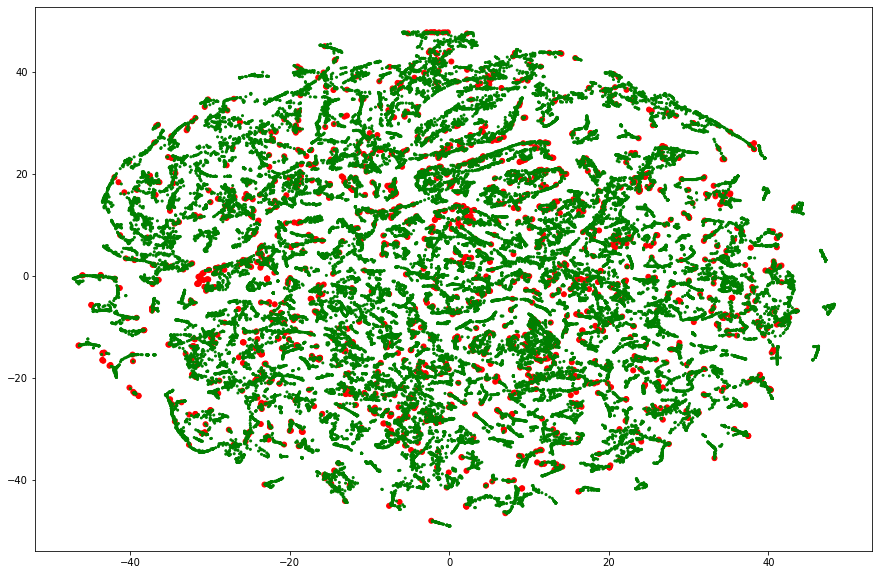

In [31]:
plot_color_dots(tsne_raw, pd.Series(y_true))

### Raw data through UMAP

In [8]:
umap_transformer = umap.UMAP()
umap_raw = umap_transformer.fit_transform(X_raw)

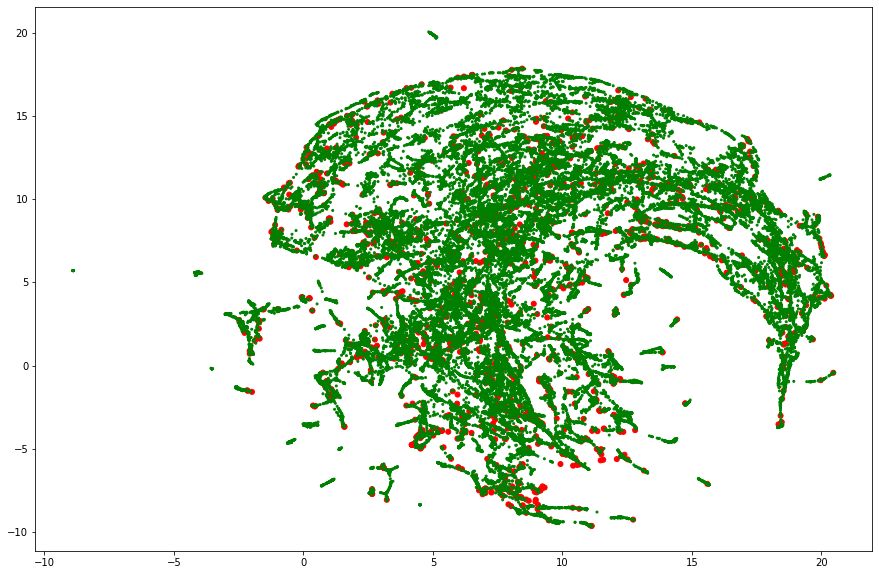

In [29]:
plot_color_dots(umap_raw, pd.Series(y_true))

### Scaled data through T-SNE

In [32]:
tsne = TSNE(n_jobs=2)
tsne_scaled = tsne.fit_transform(X_scaled)

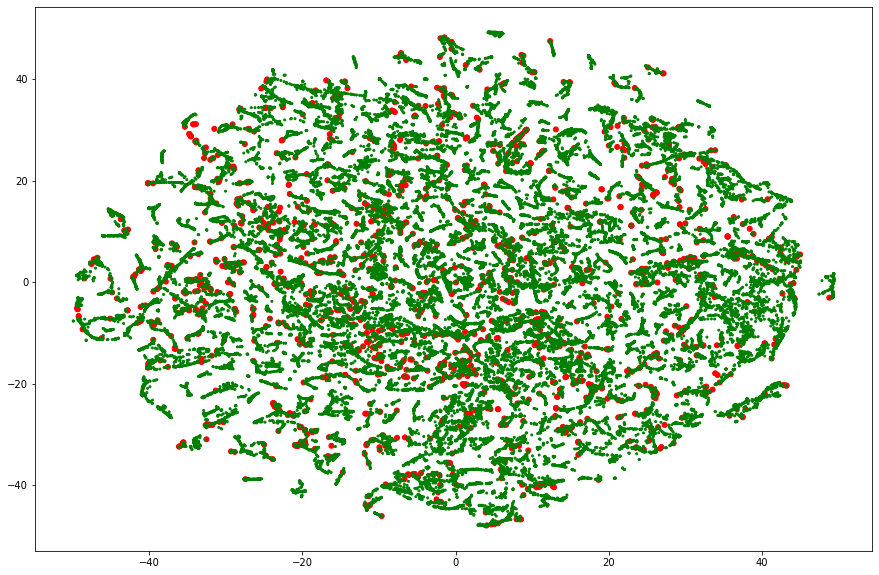

In [33]:
plot_color_dots(tsne_scaled, pd.Series(y_true))

### Scaled data through UMAP

In [34]:
umap_transformer = umap.UMAP()
umap_scaled = umap_transformer.fit_transform(X_scaled)

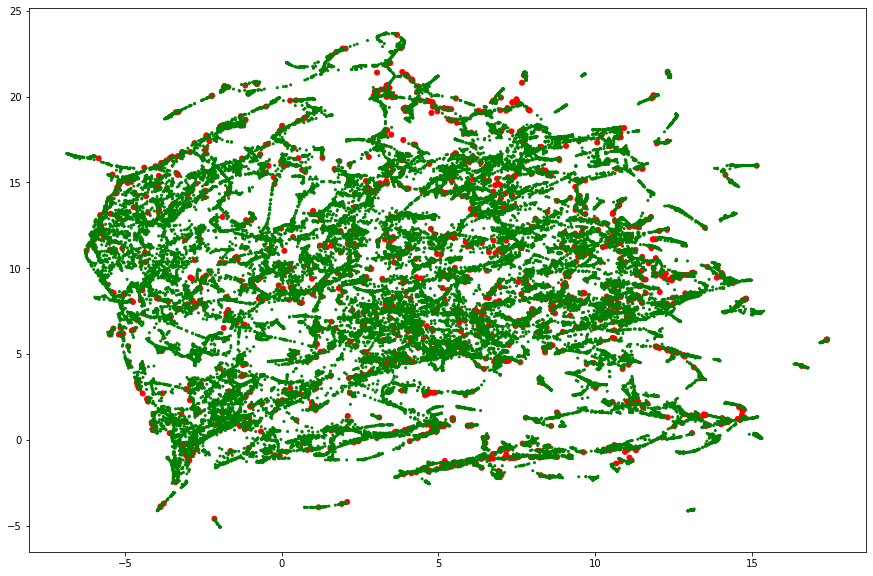

In [35]:
plot_color_dots(umap_scaled, pd.Series(y_true))

# Modelling (with labels)

### Train/test splitting

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_true, test_size=0.3)

In [8]:
y_train.sum(), y_test.sum()

(1067, 441)

### KNN

In [11]:
from itertools import chain
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import VALID_METRICS

In [17]:
param_grid = {
    'algorithm': ['kd_tree'],
    'n_jobs': [2],
    'metric': VALID_METRICS['kd_tree'],
    'n_neighbors': [1, 2, 3, 4, 5, 6]
}

In [24]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=2, verbose=3, scoring=make_scorer(roc_auc_score))
best_model = grid.fit(X_train, y_train)

Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV] algorithm=kd_tree, metric=euclidean, n_jobs=2, n_neighbors=1 ....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=kd_tree, metric=euclidean, n_jobs=2, n_neighbors=1, score=0.6110067372465035, total=  10.5s
[CV] algorithm=kd_tree, metric=euclidean, n_jobs=2, n_neighbors=1 ....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.1s remaining:    0.0s


[CV]  algorithm=kd_tree, metric=euclidean, n_jobs=2, n_neighbors=1, score=0.6028748812048553, total=   6.2s
[CV] algorithm=kd_tree, metric=euclidean, n_jobs=2, n_neighbors=2 ....


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.7s remaining:    0.0s


[CV]  algorithm=kd_tree, metric=euclidean, n_jobs=2, n_neighbors=2, score=0.5209167321716599, total=  10.2s
[CV] algorithm=kd_tree, metric=euclidean, n_jobs=2, n_neighbors=2 ....
[CV]  algorithm=kd_tree, metric=euclidean, n_jobs=2, n_neighbors=2, score=0.5182901947809093, total=   7.1s
[CV] algorithm=kd_tree, metric=euclidean, n_jobs=2, n_neighbors=3 ....
[CV]  algorithm=kd_tree, metric=euclidean, n_jobs=2, n_neighbors=3, score=0.5320281339255382, total=  10.8s
[CV] algorithm=kd_tree, metric=euclidean, n_jobs=2, n_neighbors=3 ....
[CV]  algorithm=kd_tree, metric=euclidean, n_jobs=2, n_neighbors=3, score=0.5310108131504152, total=   7.7s
[CV] algorithm=kd_tree, metric=euclidean, n_jobs=2, n_neighbors=4 ....
[CV]  algorithm=kd_tree, metric=euclidean, n_jobs=2, n_neighbors=4, score=0.5108528584568989, total=  10.9s
[CV] algorithm=kd_tree, metric=euclidean, n_jobs=2, n_neighbors=4 ....
[CV]  algorithm=kd_tree, metric=euclidean, n_jobs=2, n_neighbors=4, score=0.5045725486952274, total=   7.

[CV]  algorithm=kd_tree, metric=manhattan, n_jobs=2, n_neighbors=1, score=0.6243969010750782, total=  18.3s
[CV] algorithm=kd_tree, metric=manhattan, n_jobs=2, n_neighbors=2 ....
[CV]  algorithm=kd_tree, metric=manhattan, n_jobs=2, n_neighbors=2, score=0.5257162559884366, total=  27.6s
[CV] algorithm=kd_tree, metric=manhattan, n_jobs=2, n_neighbors=2 ....
[CV]  algorithm=kd_tree, metric=manhattan, n_jobs=2, n_neighbors=2, score=0.520372662331616, total=  21.5s
[CV] algorithm=kd_tree, metric=manhattan, n_jobs=2, n_neighbors=3 ....
[CV]  algorithm=kd_tree, metric=manhattan, n_jobs=2, n_neighbors=3, score=0.5425635111471067, total=  30.0s
[CV] algorithm=kd_tree, metric=manhattan, n_jobs=2, n_neighbors=3 ....
[CV]  algorithm=kd_tree, metric=manhattan, n_jobs=2, n_neighbors=3, score=0.5357601860823513, total=  21.5s
[CV] algorithm=kd_tree, metric=manhattan, n_jobs=2, n_neighbors=4 ....
[CV]  algorithm=kd_tree, metric=manhattan, n_jobs=2, n_neighbors=4, score=0.5128433935096307, total=  28.9

[CV]  algorithm=kd_tree, metric=infinity, n_jobs=2, n_neighbors=1, score=0.5850708436226392, total=   9.9s
[CV] algorithm=kd_tree, metric=infinity, n_jobs=2, n_neighbors=1 .....
[CV]  algorithm=kd_tree, metric=infinity, n_jobs=2, n_neighbors=1, score=0.5749630814437616, total=   6.2s
[CV] algorithm=kd_tree, metric=infinity, n_jobs=2, n_neighbors=2 .....
[CV]  algorithm=kd_tree, metric=infinity, n_jobs=2, n_neighbors=2, score=0.5115534362915101, total=  11.3s
[CV] algorithm=kd_tree, metric=infinity, n_jobs=2, n_neighbors=2 .....
[CV]  algorithm=kd_tree, metric=infinity, n_jobs=2, n_neighbors=2, score=0.5116941199472115, total=   7.1s
[CV] algorithm=kd_tree, metric=infinity, n_jobs=2, n_neighbors=3 .....
[CV]  algorithm=kd_tree, metric=infinity, n_jobs=2, n_neighbors=3, score=0.5190373955700304, total=  11.5s
[CV] algorithm=kd_tree, metric=infinity, n_jobs=2, n_neighbors=3 .....
[CV]  algorithm=kd_tree, metric=infinity, n_jobs=2, n_neighbors=3, score=0.5167037529423707, total=   7.8s
[CV

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 57.9min finished


In [28]:
grid.best_params_

{'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_jobs': 2, 'n_neighbors': 1}

In [31]:
predictions = best_model.predict(X_test)

print(classification_report(y_test, predictions))
print(roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     14559
           1       0.65      0.38      0.48       441

   micro avg       0.98      0.98      0.98     15000
   macro avg       0.81      0.69      0.73     15000
weighted avg       0.97      0.98      0.97     15000

0.6884160766442713


### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [33]:
param_grid = {
    'penalty': ['l1', 'l2', 'elastic_net', None],
    'n_jobs': [2],
    'C': [0.5, 1, 1.5],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 200, 300]
}

In [37]:
grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=2, verbose=3, scoring=make_scorer(roc_auc_score), error_score=0)
best_model = grid.fit(X_train, y_train)

Fitting 2 folds for each of 240 candidates, totalling 480 fits
[CV] C=0.5, max_iter=50, n_jobs=2, penalty=l1, solver=newton-cg ......
[CV]  C=0.5, max_iter=50, n_jobs=2, penalty=l1, solver=newton-cg, score=0, total=   0.0s
[CV] C=0.5, max_iter=50, n_jobs=2, penalty=l1, solver=newton-cg ......
[CV]  C=0.5, max_iter=50, n_jobs=2, penalty=l1, solver=newton-cg, score=0, total=   0.0s
[CV] C=0.5, max_iter=50, n_jobs=2, penalty=l1, solver=lbfgs ..........
[CV]  C=0.5, max_iter=50, n_jobs=2, penalty=l1, solver=lbfgs, score=0, total=   0.0s
[CV] C=0.5, max_iter=50, n_jobs=2, penalty=l1, solver=lbfgs ..........
[CV]  C=0.5, max_iter=50, n_jobs=2, penalty=l1, solver=lbfgs, score=0, total=   0.0s
[CV] C=0.5, max_iter=50, n_jobs=2, penalty=l1, solver=liblinear ......
[CV]  C=0.5, max_iter=50, n_jobs=2, penalty=l1, solver=liblinear, score=0.5009068606188395, total=   0.2s
[CV] C=0.5, max_iter=50, n_jobs=2, penalty=l1, solver=liblinear ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.5, max_iter=50, n_jobs=2, penalty=l1, solver=liblinear, score=0.5007612620672313, total=   0.1s
[CV] C=0.5, max_iter=50, n_jobs=2, penalty=l1, solver=sag ............
[CV]  C=0.5, max_iter=50, n_jobs=2, penalty=l1, solver=sag, score=0, total=   0.0s
[CV] C=0.5, max_iter=50, n_jobs=2, penalty=l1, solver=sag ............
[CV]  C=0.5, max_iter=50, n_jobs=2, penalty=l1, solver=sag, score=0, total=   0.0s
[CV] C=0.5, max_iter=50, n_jobs=2, penalty=l1, solver=saga ...........
[CV]  C=0.5, max_iter=50, n_jobs=2, penalty=l1, solver=saga, score=0.49997053103082456, total=   1.8s
[CV] C=0.5, max_iter=50, n_jobs=2, penalty=l1, solver=saga ...........
[CV]  C=0.5, max_iter=50, n_jobs=2, penalty=l1, solver=saga, score=0.5007907327733494, total=   1.3s
[CV] C=0.5, max_iter=50, n_jobs=2, penalty=l2, solver=newton-cg ......
[CV]  C=0.5, max_iter=50, n_jobs=2, penalty=l2, solver=newton-cg, score=0.5018431902068545, total=   0.3s
[CV] C=0.5, max_iter=50, n_jobs=2, penalty=l2, solver=newton-cg 

[CV]  C=0.5, max_iter=100, n_jobs=2, penalty=l2, solver=sag, score=0.5009068606188395, total=   1.2s
[CV] C=0.5, max_iter=100, n_jobs=2, penalty=l2, solver=sag ...........
[CV]  C=0.5, max_iter=100, n_jobs=2, penalty=l2, solver=sag, score=0.5007317913611132, total=   1.1s
[CV] C=0.5, max_iter=100, n_jobs=2, penalty=l2, solver=saga ..........
[CV]  C=0.5, max_iter=100, n_jobs=2, penalty=l2, solver=saga, score=0.5009068606188395, total=   1.2s
[CV] C=0.5, max_iter=100, n_jobs=2, penalty=l2, solver=saga ..........
[CV]  C=0.5, max_iter=100, n_jobs=2, penalty=l2, solver=saga, score=0.5007317913611132, total=   1.2s
[CV] C=0.5, max_iter=100, n_jobs=2, penalty=elastic_net, solver=newton-cg 
[CV]  C=0.5, max_iter=100, n_jobs=2, penalty=elastic_net, solver=newton-cg, score=0, total=   0.0s
[CV] C=0.5, max_iter=100, n_jobs=2, penalty=elastic_net, solver=newton-cg 
[CV]  C=0.5, max_iter=100, n_jobs=2, penalty=elastic_net, solver=newton-cg, score=0, total=   0.0s
[CV] C=0.5, max_iter=100, n_jobs=

[CV]  C=0.5, max_iter=300, n_jobs=2, penalty=l1, solver=liblinear, score=0.5007612620672313, total=   0.1s
[CV] C=0.5, max_iter=300, n_jobs=2, penalty=l1, solver=sag ...........
[CV]  C=0.5, max_iter=300, n_jobs=2, penalty=l1, solver=sag, score=0, total=   0.0s
[CV] C=0.5, max_iter=300, n_jobs=2, penalty=l1, solver=sag ...........
[CV]  C=0.5, max_iter=300, n_jobs=2, penalty=l1, solver=sag, score=0, total=   0.0s
[CV] C=0.5, max_iter=300, n_jobs=2, penalty=l1, solver=saga ..........
[CV]  C=0.5, max_iter=300, n_jobs=2, penalty=l1, solver=saga, score=0.5009068606188395, total=   4.4s
[CV] C=0.5, max_iter=300, n_jobs=2, penalty=l1, solver=saga ..........
[CV]  C=0.5, max_iter=300, n_jobs=2, penalty=l1, solver=saga, score=0.5007612620672313, total=   4.5s
[CV] C=0.5, max_iter=300, n_jobs=2, penalty=l2, solver=newton-cg .....
[CV]  C=0.5, max_iter=300, n_jobs=2, penalty=l2, solver=newton-cg, score=0.5018431902068545, total=   0.3s
[CV] C=0.5, max_iter=300, n_jobs=2, penalty=l2, solver=newt

[CV]  C=1, max_iter=50, n_jobs=2, penalty=l2, solver=liblinear, score=0.5007317913611132, total=   0.2s
[CV] C=1, max_iter=50, n_jobs=2, penalty=l2, solver=sag ..............
[CV]  C=1, max_iter=50, n_jobs=2, penalty=l2, solver=sag, score=0.5009068606188395, total=   0.6s
[CV] C=1, max_iter=50, n_jobs=2, penalty=l2, solver=sag ..............
[CV]  C=1, max_iter=50, n_jobs=2, penalty=l2, solver=sag, score=0.5007317913611132, total=   0.6s
[CV] C=1, max_iter=50, n_jobs=2, penalty=l2, solver=saga .............
[CV]  C=1, max_iter=50, n_jobs=2, penalty=l2, solver=saga, score=0.49997053103082456, total=   0.7s
[CV] C=1, max_iter=50, n_jobs=2, penalty=l2, solver=saga .............
[CV]  C=1, max_iter=50, n_jobs=2, penalty=l2, solver=saga, score=0.5007612620672313, total=   0.7s
[CV] C=1, max_iter=50, n_jobs=2, penalty=elastic_net, solver=newton-cg 
[CV]  C=1, max_iter=50, n_jobs=2, penalty=elastic_net, solver=newton-cg, score=0, total=   0.0s
[CV] C=1, max_iter=50, n_jobs=2, penalty=elastic_

[CV]  C=1, max_iter=200, n_jobs=2, penalty=l1, solver=liblinear, score=0.5018431902068545, total=   0.1s
[CV] C=1, max_iter=200, n_jobs=2, penalty=l1, solver=liblinear .......
[CV]  C=1, max_iter=200, n_jobs=2, penalty=l1, solver=liblinear, score=0.5007612620672313, total=   0.1s
[CV] C=1, max_iter=200, n_jobs=2, penalty=l1, solver=sag .............
[CV]  C=1, max_iter=200, n_jobs=2, penalty=l1, solver=sag, score=0, total=   0.0s
[CV] C=1, max_iter=200, n_jobs=2, penalty=l1, solver=sag .............
[CV]  C=1, max_iter=200, n_jobs=2, penalty=l1, solver=sag, score=0, total=   0.0s
[CV] C=1, max_iter=200, n_jobs=2, penalty=l1, solver=saga ............
[CV]  C=1, max_iter=200, n_jobs=2, penalty=l1, solver=saga, score=0.5009068606188395, total=   3.1s
[CV] C=1, max_iter=200, n_jobs=2, penalty=l1, solver=saga ............
[CV]  C=1, max_iter=200, n_jobs=2, penalty=l1, solver=saga, score=0.5007612620672313, total=   2.9s
[CV] C=1, max_iter=200, n_jobs=2, penalty=l2, solver=newton-cg .......


[CV]  C=1, max_iter=300, n_jobs=2, penalty=l2, solver=liblinear, score=0.5018431902068545, total=   0.2s
[CV] C=1, max_iter=300, n_jobs=2, penalty=l2, solver=liblinear .......
[CV]  C=1, max_iter=300, n_jobs=2, penalty=l2, solver=liblinear, score=0.5007317913611132, total=   0.2s
[CV] C=1, max_iter=300, n_jobs=2, penalty=l2, solver=sag .............
[CV]  C=1, max_iter=300, n_jobs=2, penalty=l2, solver=sag, score=0.5018431902068545, total=   3.5s
[CV] C=1, max_iter=300, n_jobs=2, penalty=l2, solver=sag .............
[CV]  C=1, max_iter=300, n_jobs=2, penalty=l2, solver=sag, score=0.5007317913611132, total=   4.3s
[CV] C=1, max_iter=300, n_jobs=2, penalty=l2, solver=saga ............
[CV]  C=1, max_iter=300, n_jobs=2, penalty=l2, solver=saga, score=0.5009068606188395, total=   4.0s
[CV] C=1, max_iter=300, n_jobs=2, penalty=l2, solver=saga ............
[CV]  C=1, max_iter=300, n_jobs=2, penalty=l2, solver=saga, score=0.5007317913611132, total=   3.7s
[CV] C=1, max_iter=300, n_jobs=2, pen

[CV]  C=1.5, max_iter=100, n_jobs=2, penalty=l1, solver=liblinear, score=0.5007612620672313, total=   0.2s
[CV] C=1.5, max_iter=100, n_jobs=2, penalty=l1, solver=sag ...........
[CV]  C=1.5, max_iter=100, n_jobs=2, penalty=l1, solver=sag, score=0, total=   0.0s
[CV] C=1.5, max_iter=100, n_jobs=2, penalty=l1, solver=sag ...........
[CV]  C=1.5, max_iter=100, n_jobs=2, penalty=l1, solver=sag, score=0, total=   0.0s
[CV] C=1.5, max_iter=100, n_jobs=2, penalty=l1, solver=saga ..........
[CV]  C=1.5, max_iter=100, n_jobs=2, penalty=l1, solver=saga, score=0.5009068606188395, total=   1.5s
[CV] C=1.5, max_iter=100, n_jobs=2, penalty=l1, solver=saga ..........
[CV]  C=1.5, max_iter=100, n_jobs=2, penalty=l1, solver=saga, score=0.5007317913611132, total=   1.6s
[CV] C=1.5, max_iter=100, n_jobs=2, penalty=l2, solver=newton-cg .....
[CV]  C=1.5, max_iter=100, n_jobs=2, penalty=l2, solver=newton-cg, score=0.5018431902068545, total=   0.3s
[CV] C=1.5, max_iter=100, n_jobs=2, penalty=l2, solver=newt

[CV]  C=1.5, max_iter=200, n_jobs=2, penalty=l2, solver=liblinear, score=0.5007317913611132, total=   0.2s
[CV] C=1.5, max_iter=200, n_jobs=2, penalty=l2, solver=sag ...........
[CV]  C=1.5, max_iter=200, n_jobs=2, penalty=l2, solver=sag, score=0.5018431902068545, total=   2.3s
[CV] C=1.5, max_iter=200, n_jobs=2, penalty=l2, solver=sag ...........
[CV]  C=1.5, max_iter=200, n_jobs=2, penalty=l2, solver=sag, score=0.5007317913611132, total=   2.4s
[CV] C=1.5, max_iter=200, n_jobs=2, penalty=l2, solver=saga ..........
[CV]  C=1.5, max_iter=200, n_jobs=2, penalty=l2, solver=saga, score=0.5009068606188395, total=   3.1s
[CV] C=1.5, max_iter=200, n_jobs=2, penalty=l2, solver=saga ..........
[CV]  C=1.5, max_iter=200, n_jobs=2, penalty=l2, solver=saga, score=0.5007317913611132, total=   2.4s
[CV] C=1.5, max_iter=200, n_jobs=2, penalty=elastic_net, solver=newton-cg 
[CV]  C=1.5, max_iter=200, n_jobs=2, penalty=elastic_net, solver=newton-cg, score=0, total=   0.0s
[CV] C=1.5, max_iter=200, n_j

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  3.0min finished


In [38]:
grid.best_params_

{'C': 1, 'max_iter': 50, 'n_jobs': 2, 'penalty': 'l1', 'solver': 'liblinear'}

In [39]:
predictions = best_model.predict(X_test)

print(classification_report(y_test, predictions))
print(roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     14559
           1       1.00      0.00      0.01       441

   micro avg       0.97      0.97      0.97     15000
   macro avg       0.99      0.50      0.50     15000
weighted avg       0.97      0.97      0.96     15000

0.5022675736961452


### SVM

In [47]:
from sklearn.svm import SVC

In [71]:
param_grid = {
    'kernel': ['rbf'],
    'C': [0.5, 1, 2, 3, 4, 5, 6],
    'max_iter': [1000, 1050, 1100, 1150]
}

In [72]:
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=2, verbose=3, scoring=make_scorer(roc_auc_score), error_score=0)
best_model = grid.fit(X_train, y_train)

Fitting 2 folds for each of 28 candidates, totalling 56 fits
[CV] C=0.5, kernel=rbf, max_iter=1000 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... C=0.5, kernel=rbf, max_iter=1000, score=0.5, total=   3.8s
[CV] C=0.5, kernel=rbf, max_iter=1000 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


[CV]  C=0.5, kernel=rbf, max_iter=1000, score=0.50093808630394, total=   3.7s
[CV] C=0.5, kernel=rbf, max_iter=1050 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.1s remaining:    0.0s


[CV] ...... C=0.5, kernel=rbf, max_iter=1050, score=0.5, total=   3.9s
[CV] C=0.5, kernel=rbf, max_iter=1050 ................................
[CV]  C=0.5, kernel=rbf, max_iter=1050, score=0.50093808630394, total=   4.0s
[CV] C=0.5, kernel=rbf, max_iter=1100 ................................
[CV] ...... C=0.5, kernel=rbf, max_iter=1100, score=0.5, total=   4.0s
[CV] C=0.5, kernel=rbf, max_iter=1100 ................................
[CV]  C=0.5, kernel=rbf, max_iter=1100, score=0.50093808630394, total=   4.1s
[CV] C=0.5, kernel=rbf, max_iter=1150 ................................
[CV] ...... C=0.5, kernel=rbf, max_iter=1150, score=0.5, total=   3.9s
[CV] C=0.5, kernel=rbf, max_iter=1150 ................................
[CV]  C=0.5, kernel=rbf, max_iter=1150, score=0.50093808630394, total=   3.9s
[CV] C=1, kernel=rbf, max_iter=1000 ..................................
[CV]  C=1, kernel=rbf, max_iter=1000, score=0.50187265917603, total=   3.7s
[CV] C=1, kernel=rbf, max_iter=1000 ...............

[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:  5.3min finished


In [73]:
grid.best_params_

{'C': 6, 'kernel': 'rbf', 'max_iter': 1000}

In [74]:
predictions = best_model.predict(X_test)

print(classification_report(y_test, predictions))
print(roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     14559
           1       0.22      0.05      0.08       441

   micro avg       0.97      0.97      0.97     15000
   macro avg       0.60      0.52      0.53     15000
weighted avg       0.95      0.97      0.96     15000

0.5223332412846999


### LightGBM

In [12]:
from lightgbm import LGBMClassifier

In [13]:
model = LGBMClassifier(learning_rate=0.1, silent=False, n_estimators=2000)
model.fit(X_train, y_train, eval_set=[(X_train, y_train)], verbose=100)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print(roc_auc_score(y_test, predictions))

[100]	valid_0's binary_logloss: 0.055939
[200]	valid_0's binary_logloss: 0.0283638
[300]	valid_0's binary_logloss: 0.0163541
[400]	valid_0's binary_logloss: 0.00960893
[500]	valid_0's binary_logloss: 0.00592182
[600]	valid_0's binary_logloss: 0.00365212
[700]	valid_0's binary_logloss: 0.00217854
[800]	valid_0's binary_logloss: 0.00135729
[900]	valid_0's binary_logloss: 0.000813853
[1000]	valid_0's binary_logloss: 0.000503799
[1100]	valid_0's binary_logloss: 0.000314533
[1200]	valid_0's binary_logloss: 0.00018907
[1300]	valid_0's binary_logloss: 0.000113051
[1400]	valid_0's binary_logloss: 6.6933e-05
[1500]	valid_0's binary_logloss: 4.07848e-05
[1600]	valid_0's binary_logloss: 2.42007e-05
[1700]	valid_0's binary_logloss: 1.4472e-05
[1800]	valid_0's binary_logloss: 8.93149e-06
[1900]	valid_0's binary_logloss: 5.59203e-06
[2000]	valid_0's binary_logloss: 3.57481e-06
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     14526
           1   

### Neural Network

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

In [33]:
model = Sequential()
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.01), loss=binary_crossentropy)

model.fit(X_train, y_train, epochs=60)
predictions = model.predict(X_test).reshape(-1)

print(classification_report(y_test, predictions > 0.5))
print(roc_auc_score(y_test, predictions))

Epoch 1/60
35000/35000 [==============================] - 3s 83us/sample - loss: 0.1388
Epoch 2/60
35000/35000 [==============================] - 2s 58us/sample - loss: 0.1332
Epoch 3/60
35000/35000 [==============================] - 2s 55us/sample - loss: 0.1306
Epoch 4/60
35000/35000 [==============================] - 2s 54us/sample - loss: 0.1286
Epoch 5/60
35000/35000 [==============================] - 2s 54us/sample - loss: 0.1266
Epoch 6/60
35000/35000 [==============================] - 2s 52us/sample - loss: 0.1240
Epoch 7/60
35000/35000 [==============================] - 2s 51us/sample - loss: 0.1215
Epoch 8/60
35000/35000 [==============================] - 2s 50us/sample - loss: 0.1189
Epoch 9/60
35000/35000 [==============================] - 2s 52us/sample - loss: 0.1169
Epoch 10/60
35000/35000 [==============================] - 2s 48us/sample - loss: 0.1142
Epoch 11/60
35000/35000 [==============================] - 2s 48us/sample - loss: 0.1134
Epoch 12/60
35000/35000 [=====